In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 43 kB/s 
     |████████████████████████████████| 199 kB 51.6 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845513 sha256=010fbb6f96ee832b591c64803908bc8ccf273a148261e0c291be64ce58fa5944
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import os
os.chdir('/content/gdrive/MyDrive/Rain Australia Pyspark')
os.getcwd()

'/content/gdrive/MyDrive/Rain Australia Pyspark'

In [ ]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
# initialize a new Spark Context to use for the execution of the script
sc = SparkContext(appName="rainTomm", master="local[*]")
sqlCtx = SQLContext(sc)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:114: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning,


# Read the data set and Perform Exploratory data analysis 

In [ ]:
filename = 'weatherAUS.csv'
df = sqlCtx.read.load(filename,
                     format="csv", sep=",", inferSchema="true", header="true")

In [ ]:
df.printSchema()

root
 |-- Date: timestamp (nullable = true)
 |-- Location: string (nullable = true)
 |-- MinTemp: string (nullable = true)
 |-- MaxTemp: string (nullable = true)
 |-- Rainfall: string (nullable = true)
 |-- Evaporation: string (nullable = true)
 |-- Sunshine: string (nullable = true)
 |-- WindGustDir: string (nullable = true)
 |-- WindGustSpeed: string (nullable = true)
 |-- WindDir9am: string (nullable = true)
 |-- WindDir3pm: string (nullable = true)
 |-- WindSpeed9am: string (nullable = true)
 |-- WindSpeed3pm: string (nullable = true)
 |-- Humidity9am: string (nullable = true)
 |-- Humidity3pm: string (nullable = true)
 |-- Pressure9am: string (nullable = true)
 |-- Pressure3pm: string (nullable = true)
 |-- Cloud9am: string (nullable = true)
 |-- Cloud3pm: string (nullable = true)
 |-- Temp9am: string (nullable = true)
 |-- Temp3pm: string (nullable = true)
 |-- RainToday: string (nullable = true)
 |-- RainTomorrow: string (nullable = true)



In [ ]:
df.show(5)

+-------------------+--------+-------+-------+--------+-----------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+---------+------------+
|               Date|Location|MinTemp|MaxTemp|Rainfall|Evaporation|Sunshine|WindGustDir|WindGustSpeed|WindDir9am|WindDir3pm|WindSpeed9am|WindSpeed3pm|Humidity9am|Humidity3pm|Pressure9am|Pressure3pm|Cloud9am|Cloud3pm|Temp9am|Temp3pm|RainToday|RainTomorrow|
+-------------------+--------+-------+-------+--------+-----------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+---------+------------+
|2008-12-01 00:00:00|  Albury|   13.4|   22.9|     0.6|         NA|      NA|          W|           44|         W|       WNW|          20|          24|         71|         22|     1007.7|     1007.1|       8|      NA|   16.9|   21.8|

In [ ]:
# Get row count
rows = df.count()
print(f"DataFrame Rows count : {rows}")

DataFrame Rows count : 145460


In [ ]:
# Get columns count
cols = len(df.columns)
print(f"DataFrame Columns count : {cols}")

DataFrame Columns count : 23


In [ ]:
# lets see average of numerical columns
numeric=["MinTemp","MaxTemp","Rainfall","WindGustSpeed","WindSpeed9am","WindSpeed3pm","Humidity9am",
                  "Humidity3pm","Pressure9am","Pressure3pm"]
from pyspark.sql.functions import mean
numeric_col = [df['MinTemp'],df['MaxTemp'],df['Rainfall'],df['WindGustSpeed'],df['WindSpeed9am'],df['WindSpeed3pm'],df['Humidity9am'],df['Humidity3pm'],df['Pressure9am']]
for i in numeric_col:
  average = df.select([mean(i)]).show()
  average

+------------------+
|      avg(MinTemp)|
+------------------+
|12.194034380968894|
+------------------+

+------------------+
|      avg(MaxTemp)|
+------------------+
|23.221348275647014|
+------------------+

+------------------+
|     avg(Rainfall)|
+------------------+
|2.3609181499168272|
+------------------+

+------------------+
|avg(WindGustSpeed)|
+------------------+
| 40.03523007167319|
+------------------+

+------------------+
| avg(WindSpeed9am)|
+------------------+
|14.043425914971502|
+------------------+

+------------------+
| avg(WindSpeed3pm)|
+------------------+
|18.662656778887342|
+------------------+

+-----------------+
| avg(Humidity9am)|
+-----------------+
|68.88083133761887|
+-----------------+

+----------------+
|avg(Humidity3pm)|
+----------------+
|51.5391158755046|
+----------------+

+------------------+
|  avg(Pressure9am)|
+------------------+
|1017.6499397983058|
+------------------+



In [ ]:
df.describe('WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm').show()

+-------+------------------+------------------+------------------+------------------+------------------+------------------+
|summary|      WindSpeed9am|      WindSpeed3pm|       Humidity9am|       Humidity3pm|       Pressure9am|       Pressure3pm|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+
|  count|            145460|            145460|            145460|            145460|            145460|            145460|
|   mean|14.043425914971502|18.662656778887342| 68.88083133761887|  51.5391158755046|1017.6499397983058|1015.2558888309709|
| stddev|  8.91537532267949| 8.809800021251455|19.029164451844167|20.795901656021204| 7.106530287523044|   7.0374138081683|
|    min|                 0|                 0|                 0|                 0|              1000|              1000|
|    max|                NA|                NA|                NA|                NA|                NA|                NA|
+-------

In [ ]:
df.describe('Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm').show()

+-------+------------------+-----------------+------------------+-----------------+
|summary|          Cloud9am|         Cloud3pm|           Temp9am|          Temp3pm|
+-------+------------------+-----------------+------------------+-----------------+
|  count|            145460|           145460|            145460|           145460|
|   mean|4.4474612602152455|4.509930082924903|16.990631415587398|21.68339031800979|
| stddev|2.8871588535172408|2.720357310332465| 6.488753140877276|6.936650460035533|
|    min|                 0|                0|              -0.1|             -0.1|
|    max|                NA|               NA|                NA|               NA|
+-------+------------------+-----------------+------------------+-----------------+



In [ ]:
# Extracting  Month
import pyspark.sql.functions as F
from pyspark.sql.functions import when, col, isnan, count,  regexp_replace, udf
df2 = df.withColumn("Month", F.regexp_extract(col("Date"), r'(\d{1,2})/(\d{1,2})/(\d{4})', 2))

# Extracting  Season
df2 = df2.withColumn("Season", when((df2.Month ==12.0),"Winter") \
                               .when((df2.Month > 2.0) & (df2.Month <=5.0),"Spring") \
                               .when((df2.Month > 5.0) & (df2.Month <=8.0),"Summer")
                                .otherwise("Fall"))

In [ ]:
# using query aggregate finding seasons highes value
df2.createOrReplaceTempView("tmp")
tot = df2.count()
query = sqlCtx.sql("SELECT Season, count(*)/"+str(tot)+" * 100 as percentage FROM tmp GROUP BY Season ORDER BY percentage DESC")
query.show()

+------+----------+
|Season|percentage|
+------+----------+
|  Fall|     100.0|
+------+----------+



In [ ]:
# Count for categories in RainToday
df.groupBy('RainToday').agg({'RainToday':'count'}).orderBy('count(RainToday)').collect()

[Row(RainToday='NA', count(RainToday)=3261),
 Row(RainToday='Yes', count(RainToday)=31880),
 Row(RainToday='No', count(RainToday)=110319)]

In [ ]:
# Count for categories in RainTomorrow
df.groupBy('RainTomorrow').agg({'RainTomorrow':'count'}).orderBy('count(RainTomorrow)').collect()

[Row(RainTomorrow='NA', count(RainTomorrow)=3267),
 Row(RainTomorrow='Yes', count(RainTomorrow)=31877),
 Row(RainTomorrow='No', count(RainTomorrow)=110316)]

In [ ]:
df2.groupBy("Month","Sunshine").agg({'Evaporation':'avg'}).sort('Month').show(5)

+-----+--------+------------------+
|Month|Sunshine|  avg(Evaporation)|
+-----+--------+------------------+
|     |    11.8| 8.020729366602692|
|     |       0|3.9540760869565177|
|     |       9| 4.526933701657454|
|     |     0.8|3.7284345047923324|
|     |    14.1| 7.233333333333333|
+-----+--------+------------------+
only showing top 5 rows



In [ ]:
df2.groupBy("Location","Sunshine").agg({'Evaporation':'avg'}).sort('Location').show(5)

+--------+--------+------------------+
|Location|Sunshine|  avg(Evaporation)|
+--------+--------+------------------+
|Adelaide|    11.2| 7.488888888888888|
|Adelaide|     2.8|5.1000000000000005|
|Adelaide|     7.8| 5.046153846153846|
|Adelaide|      11| 9.094117647058823|
|Adelaide|       2|2.6333333333333333|
+--------+--------+------------------+
only showing top 5 rows



# Data Cleaning 

In [ ]:
categorical=['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']

for i in categorical:
  freq_dis = df.cube(i).count().show()
  freq_dis

+-----------+------+
|WindGustDir| count|
+-----------+------+
|        WNW|  8252|
|        SSW|  8736|
|        NNE|  6548|
|        SSE|  9216|
|          N|  9313|
|       null|145460|
|         NW|  8122|
|        ESE|  7372|
|         NA| 10326|
|        WSW|  9069|
|          S|  9168|
|        NNW|  6620|
|        ENE|  8104|
|          W|  9915|
|         SW|  8967|
|         SE|  9418|
|         NE|  7133|
|          E|  9181|
+-----------+------+

+----------+------+
|WindDir9am| count|
+----------+------+
|       WNW|  7414|
|       SSW|  7587|
|       NNE|  8129|
|       SSE|  9112|
|         N| 11758|
|      null|145460|
|        NW|  8749|
|       ESE|  7630|
|        NA| 10566|
|       WSW|  7024|
|         S|  8659|
|       NNW|  7980|
|       ENE|  7836|
|         W|  8459|
|        SW|  8423|
|        SE|  9287|
|        NE|  7671|
|         E|  9176|
+----------+------+

+----------+------+
|WindDir3pm| count|
+----------+------+
|       WNW|  8874|
|       SSW|  81

In [ ]:
# Counting the number of NA(null) values in each column
for column_name in df.columns:
    print("Number of NA(null) values in",column_name,":",df.filter(df[column_name] == "NA").count())


Number of NA(null) values in Date : 0
Number of NA(null) values in Location : 0
Number of NA(null) values in MinTemp : 1485
Number of NA(null) values in MaxTemp : 1261
Number of NA(null) values in Rainfall : 3261
Number of NA(null) values in Evaporation : 62790
Number of NA(null) values in Sunshine : 69835
Number of NA(null) values in WindGustDir : 10326
Number of NA(null) values in WindGustSpeed : 10263
Number of NA(null) values in WindDir9am : 10566
Number of NA(null) values in WindDir3pm : 4228
Number of NA(null) values in WindSpeed9am : 1767
Number of NA(null) values in WindSpeed3pm : 3062
Number of NA(null) values in Humidity9am : 2654
Number of NA(null) values in Humidity3pm : 4507
Number of NA(null) values in Pressure9am : 15065
Number of NA(null) values in Pressure3pm : 15028
Number of NA(null) values in Cloud9am : 55888
Number of NA(null) values in Cloud3pm : 59358
Number of NA(null) values in Temp9am : 1767
Number of NA(null) values in Temp3pm : 3609
Number of NA(null) values

In [ ]:
from pyspark.sql.functions import when
import numpy as np

columnNA = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
for column in columnNA:
    df = df.withColumn(column, when(df[column] == "NA", None).otherwise(df[column]))

In [ ]:
# Removing null values 

from pyspark.sql.functions import when
from pyspark.sql.functions import regexp_replace
from pyspark.sql.types import FloatType
from pyspark.sql.types import IntegerType

df = df.na.drop()

df.show(10)

+-------------------+--------+-------+-------+--------+-----------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+---------+------------+
|               Date|Location|MinTemp|MaxTemp|Rainfall|Evaporation|Sunshine|WindGustDir|WindGustSpeed|WindDir9am|WindDir3pm|WindSpeed9am|WindSpeed3pm|Humidity9am|Humidity3pm|Pressure9am|Pressure3pm|Cloud9am|Cloud3pm|Temp9am|Temp3pm|RainToday|RainTomorrow|
+-------------------+--------+-------+-------+--------+-----------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+---------+------------+
|2009-01-01 00:00:00|   Cobar|   17.9|   35.2|       0|         12|    12.3|        SSW|           48|       ENE|        SW|           6|          20|         20|         13|     1006.3|     1004.4|       2|       5|   26.6|   33.4|

In [ ]:
# dropping NA in target col
df = df.filter(~(col('RainTomorrow') == 'NA'))
# dropping NA in target col
df = df.filter(~(col('RainTomorrow') == 'NA'))

In [ ]:
# Counting the number of NA(null) values in each column again
for column_name in df.columns:
    print("Number of NA(null) values in",column_name,":",df.filter(df[column_name] == "NA").count())


Number of NA(null) values in Location : 0
Number of NA(null) values in MinTemp : 0
Number of NA(null) values in MaxTemp : 0
Number of NA(null) values in Rainfall : 0
Number of NA(null) values in Evaporation : 0
Number of NA(null) values in Sunshine : 0
Number of NA(null) values in WindGustDir : 0
Number of NA(null) values in WindGustSpeed : 0
Number of NA(null) values in WindDir9am : 0
Number of NA(null) values in WindDir3pm : 0
Number of NA(null) values in WindSpeed9am : 0
Number of NA(null) values in WindSpeed3pm : 0
Number of NA(null) values in Humidity9am : 0
Number of NA(null) values in Humidity3pm : 0
Number of NA(null) values in Pressure9am : 0
Number of NA(null) values in Pressure3pm : 0
Number of NA(null) values in Cloud9am : 0
Number of NA(null) values in Cloud3pm : 0
Number of NA(null) values in Temp9am : 0
Number of NA(null) values in Temp3pm : 0
Number of NA(null) values in RainToday : 0
Number of NA(null) values in RainTomorrow : 0


In [ ]:
#create a list containing columns which are not contributing to the rain prediction 
drop_list = ['Date']
# renew dataframe by select columns not in the drop_list
df = df.select([column for column in df.columns if column not in drop_list])
# to check whether makes it or not
df.show(0,truncate=False)

+--------+-------+-------+--------+-----------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+---------+------------+
|Location|MinTemp|MaxTemp|Rainfall|Evaporation|Sunshine|WindGustDir|WindGustSpeed|WindDir9am|WindDir3pm|WindSpeed9am|WindSpeed3pm|Humidity9am|Humidity3pm|Pressure9am|Pressure3pm|Cloud9am|Cloud3pm|Temp9am|Temp3pm|RainToday|RainTomorrow|
+--------+-------+-------+--------+-----------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+---------+------------+
+--------+-------+-------+--------+-----------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+---------+------------+
only showing top 0 rows



# Perform Visualization

## Pie chart

In [ ]:
import pandas as pd
RainTomorrow = list(df.select('RainTomorrow').rdd.flatMap(lambda x: x).collect())


In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

The Data is Skewed toward 'No' as 78% data is of the day when it did not rain tomorrow


Counter({'No': 43993, 'Yes': 12427})


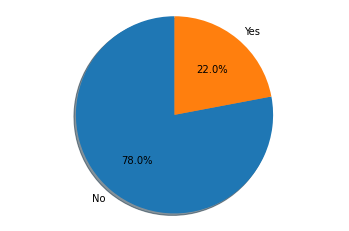

In [ ]:

status_d=Counter(RainTomorrow)
print(status_d)

key_list = list(status_d.keys())
val_list = list(status_d.values())

fig1, ax1 = plt.subplots()
ax1.pie(val_list, labels=key_list, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Barplot

In [ ]:
WindDir9am = list(df.select('WindDir9am').rdd.flatMap(lambda x: x).collect())

WE can see that Most wind blows at the North Direction


Counter({'N': 4967, 'E': 4456, 'ENE': 3932, 'SSE': 3893, 'SE': 3880, 'W': 3707, 'S': 3421, 'ESE': 3400, 'NE': 3390, 'SW': 3356, 'NNE': 3267, 'WSW': 3037, 'NNW': 3016, 'SSW': 2926, 'WNW': 2918, 'NW': 2854})


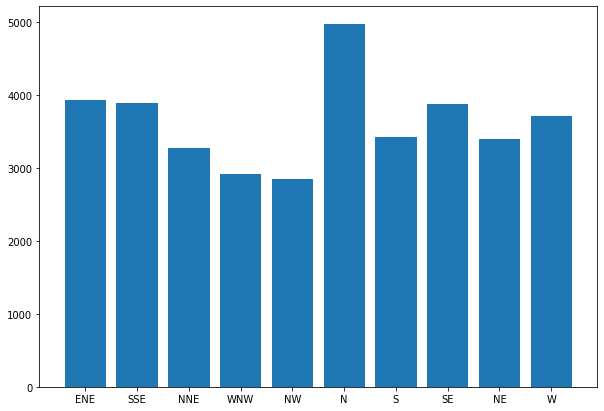

In [ ]:

status_d=Counter(WindDir9am)
print(status_d)

key_list = list(status_d.keys())
val_list = list(status_d.values())
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(key_list[0:10], val_list[0:10])
 
# Show Plot
plt.show()

Most of the time the wind is stable between 35-40.

Counter({'35': 3965, '39': 3884, '37': 3727, '31': 3582, '33': 3580, '41': 3344, '30': 2861, '43': 2653, '28': 2534, '48': 2324, '44': 2270, '46': 2139, '50': 2090, '26': 1816, '52': 1786, '54': 1494, '24': 1437, '56': 1200, '57': 1043, '22': 1018, '59': 888, '20': 839, '61': 767, '63': 624, '19': 537, '65': 478, '17': 406, '69': 386, '72': 361, '70': 360, '67': 349, '74': 235, '76': 230, '15': 200, '80': 157, '81': 121, '78': 120, '83': 95, '13': 87, '85': 73, '87': 62, '91': 46, '93': 40, '89': 39, '94': 35, '98': 28, '96': 27, '100': 17, '102': 12, '11': 12, '104': 11, '106': 10, '107': 6, '115': 4, '109': 3, '117': 2, '113': 2, '122': 1, '9': 1, '124': 1, '111': 1})


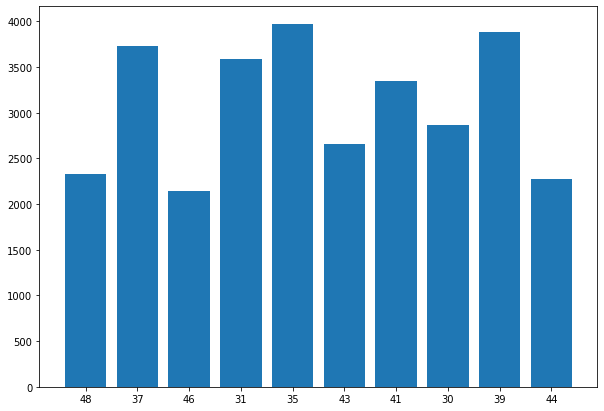

In [ ]:
WindGustSpeed = list(df.select('WindGustSpeed').rdd.flatMap(lambda x: x).collect())
status_d=Counter(WindGustSpeed)
print(status_d)

key_list = list(status_d.keys())
val_list = list(status_d.values())
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(key_list[0:10], val_list[0:10])
 
# Show Plot
plt.show()


From Below chart it is hard to find out insight but we can see that most of the days at different location there is no rain. 

Counter({'0': 36709, '0.2': 3009, '0.4': 1593, '0.6': 1087, '0.8': 834, '1': 695, '1.2': 609, '1.4': 556, '1.6': 480, '1.8': 440, '2': 436, '2.2': 404, '2.4': 351, '2.6': 349, '2.8': 296, '3': 284, '3.2': 277, '3.8': 260, '3.4': 248, '3.6': 232, '4': 218, '4.2': 203, '4.4': 191, '5': 187, '4.6': 172, '4.8': 169, '5.2': 165, '6': 144, '5.8': 140, '5.4': 138, '5.6': 129, '6.2': 129, '7': 119, '6.6': 116, '7.8': 109, '7.2': 102, '6.8': 100, '6.4': 99, '8': 99, '7.4': 98, '8.6': 95, '7.6': 94, '8.2': 92, '8.4': 90, '8.8': 89, '9.8': 86, '9': 84, '9.6': 82, '10.2': 77, '9.2': 76, '9.4': 76, '11.2': 73, '11.4': 67, '10.4': 67, '10': 64, '13.2': 64, '12': 62, '10.8': 62, '11.8': 56, '11': 54, '13.4': 54, '11.6': 53, '14.4': 50, '12.8': 50, '12.4': 50, '10.6': 48, '12.2': 48, '13.6': 48, '14.6': 44, '13.8': 42, '14.8': 42, '15.4': 40, '17.4': 39, '15.2': 39, '17.8': 38, '16.8': 37, '14.2': 37, '12.6': 37, '16.2': 36, '15.8': 35, '16': 35, '13': 34, '15': 34, '17.6': 33, '16.6': 32, '16.4': 31,

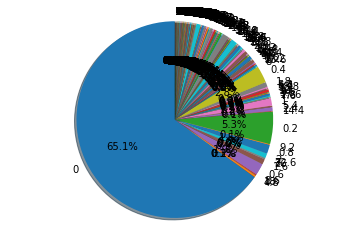

In [ ]:
Rainfall =list(df.select('Rainfall').rdd.flatMap(lambda x: x).collect())
status_d=Counter(Rainfall)
print(status_d)

key_list = list(status_d.keys())
val_list = list(status_d.values())

fig1, ax1 = plt.subplots()
ax1.pie(val_list, labels=key_list, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Humidity in the morining highest to 71.

Counter({'68': 1314, '67': 1300, '69': 1288, '65': 1286, '64': 1277, '62': 1261, '66': 1259, '71': 1247, '61': 1214, '70': 1213, '63': 1195, '72': 1165, '73': 1144, '74': 1138, '60': 1134, '58': 1130, '75': 1127, '59': 1122, '76': 1107, '57': 1072, '78': 1042, '56': 1016, '77': 1010, '79': 981, '55': 980, '80': 957, '82': 912, '54': 904, '81': 891, '52': 847, '53': 843, '83': 826, '84': 794, '85': 736, '87': 735, '51': 729, '86': 725, '50': 724, '89': 676, '48': 668, '88': 658, '91': 634, '93': 612, '49': 610, '99': 609, '90': 600, '92': 588, '47': 578, '94': 542, '96': 531, '46': 497, '95': 495, '100': 491, '45': 479, '97': 465, '44': 444, '43': 406, '42': 395, '41': 379, '40': 335, '38': 334, '39': 333, '37': 267, '36': 263, '34': 238, '35': 232, '33': 215, '98': 193, '30': 191, '32': 191, '31': 187, '29': 184, '28': 171, '27': 158, '25': 152, '24': 151, '26': 144, '23': 144, '22': 128, '21': 124, '20': 115, '16': 115, '17': 101, '18': 94, '19': 92, '14': 81, '15': 76, '11': 69, '12'

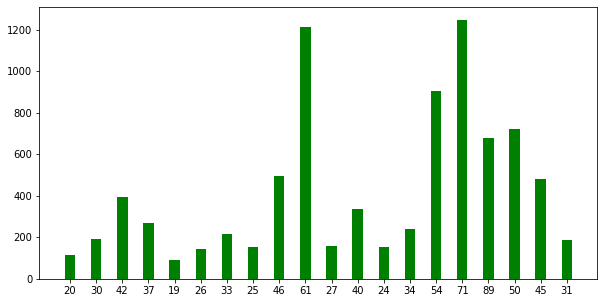

In [ ]:
Humidity9am = list(df.select('Humidity9am').rdd.flatMap(lambda x: x).collect())

status_d=Counter(Humidity9am)
print(status_d)

key_list = list(status_d.keys())
val_list = list(status_d.values())
 
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(key_list[0:20], val_list[0:20], color ='green',
        width = 0.4)
 
plt.show()

Pressure in the Atmosphere keeps on fluctuating as a result is it difficult to prdict the rainfall only based on air pressure.

Counter({'1016.4': 382, '1015.9': 361, '1017.7': 350, '1018.2': 349, '1018': 347, '1014.6': 345, '1016.7': 345, '1015.7': 341, '1017.6': 338, '1017.1': 338, '1016.3': 337, '1017.3': 337, '1017.5': 336, '1015.2': 335, '1015.6': 335, '1017.2': 334, '1016.5': 334, '1017.8': 331, '1016.9': 330, '1016.2': 330, '1019.2': 330, '1017.9': 330, '1015.8': 329, '1018.7': 329, '1017.4': 329, '1015.5': 328, '1019.4': 327, '1015.3': 326, '1014.9': 323, '1019.3': 322, '1016.8': 321, '1018.6': 321, '1014.5': 319, '1013.7': 319, '1016': 318, '1019.9': 317, '1015.4': 317, '1016.6': 315, '1014.8': 314, '1017': 314, '1018.4': 313, '1019.7': 313, '1013.1': 312, '1015.1': 312, '1013.8': 311, '1016.1': 311, '1018.3': 311, '1014.1': 309, '1019.6': 309, '1018.5': 307, '1014.2': 306, '1019': 306, '1013.3': 304, '1019.5': 304, '1019.1': 303, '1018.9': 302, '1013.6': 300, '1013.2': 300, '1018.8': 300, '1020.5': 300, '1012.9': 298, '1015': 298, '1014.7': 297, '1014.4': 296, '1019.8': 296, '1013.9': 294, '1012.8': 2

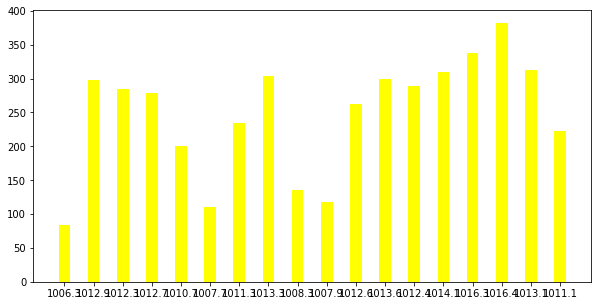

In [ ]:
Pressure9am = list(df.select('Pressure9am').rdd.flatMap(lambda x: x).collect())
status_d=Counter(Pressure9am)
print(status_d)

key_list = list(status_d.keys())
val_list = list(status_d.values())
 
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(key_list[0:18], val_list[0:18], color ='yellow',
        width = 0.4)
 
plt.show()

We can see that the data was evenly collected fom different location.

Counter({'Darwin': 3062, 'Perth': 3025, 'Brisbane': 2953, 'MelbourneAirport': 2929, 'PerthAirport': 2913, 'SydneyAirport': 2870, 'Watsonia': 2730, 'Mildura': 2594, 'MountGambier': 2465, 'NorfolkIsland': 2464, 'Cairns': 2444, 'Townsville': 2419, 'WaggaWagga': 2416, 'AliceSprings': 2223, 'Nuriootpa': 2008, 'Hobart': 1939, 'Moree': 1913, 'Melbourne': 1898, 'Portland': 1863, 'Woomera': 1734, 'Sydney': 1690, 'Sale': 1678, 'CoffsHarbour': 1380, 'Williamtown': 1198, 'Canberra': 1078, 'Cobar': 534})


(-1.1002613400484633,
 1.1002603440167302,
 -1.1012624246260294,
 1.1000601154583824)

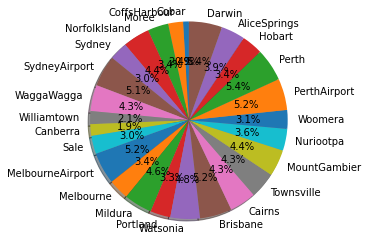

In [ ]:
Location = list(df.select('Location').rdd.flatMap(lambda x: x).collect())
status_d=Counter(Location)
print(status_d)

key_list = list(status_d.keys())
val_list = list(status_d.values())

fig1, ax1 = plt.subplots()
ax1.pie(val_list, labels=key_list, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


# Model Building

In [ ]:
from pyspark.sql.types import DoubleType
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler

numeric_col = ['MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Humidity3pm','Humidity9am','Pressure3pm']

for i in numeric_col:
    df = df.withColumn(i, df[i].cast(DoubleType()))

### One Hot Encoding and labelling

In [ ]:
import pyspark
from pyspark.ml import Pipeline
from distutils.version import LooseVersion
 
categoricalColumns = ["WindGustDir","WindDir9am","WindDir3pm","RainToday","RainTomorrow"]
stages = [] # stages in Pipeline
for categoricalCol in categoricalColumns:
    # Category Indexing with StringIndexer
    stringIndexer = StringIndexer(inputCol=categoricalCol, outputCol=categoricalCol + "_label")
    # Use OneHotEncoder to convert categorical variables into binary SparseVectors
    if LooseVersion(pyspark.__version__) < LooseVersion("3.0"):
        from pyspark.ml.feature import OneHotEncoderEstimator
        encoder = OneHotEncoderEstimator(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    else:
        from pyspark.ml.feature import OneHotEncoder
        encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    # Add stages.  These are not run here, but will run all at once later on.
    stages += [stringIndexer, encoder]

In [ ]:
alist = []
Non_numeric_col = ["WindGustDir","WindDir9am","WindDir3pm","RainToday","RainTomorrow"]
for c in df.columns :
    if c not in Non_numeric_col: 
        #transforming numerical data into double type
        df = df.withColumn(c,df[c].cast(DoubleType()))
    else:
        #transforming non-numerical data into number by using StringIndexer
        alist.append(StringIndexer(inputCol = c, outputCol = c + "_label"))
        
# Fit the pipeline to training documents.       
pipeline = Pipeline(stages=alist)
pipelineFit = pipeline.fit(df)
dataset = pipelineFit.transform(df)

#drop original columns whose indexing are done
dataset = dataset.select([c for c in dataset.columns if c not in Non_numeric_col])
dataset.printSchema()

root
 |-- Location: double (nullable = true)
 |-- MinTemp: double (nullable = true)
 |-- MaxTemp: double (nullable = true)
 |-- Rainfall: double (nullable = true)
 |-- Evaporation: double (nullable = true)
 |-- Sunshine: double (nullable = true)
 |-- WindGustSpeed: double (nullable = true)
 |-- WindSpeed9am: double (nullable = true)
 |-- WindSpeed3pm: double (nullable = true)
 |-- Humidity9am: double (nullable = true)
 |-- Humidity3pm: double (nullable = true)
 |-- Pressure9am: double (nullable = true)
 |-- Pressure3pm: double (nullable = true)
 |-- Cloud9am: double (nullable = true)
 |-- Cloud3pm: double (nullable = true)
 |-- Temp9am: double (nullable = true)
 |-- Temp3pm: double (nullable = true)
 |-- WindGustDir_label: double (nullable = false)
 |-- WindDir9am_label: double (nullable = false)
 |-- WindDir3pm_label: double (nullable = false)
 |-- RainToday_label: double (nullable = false)
 |-- RainTomorrow_label: double (nullable = false)



In [ ]:
#Bind all feature columns
vector_assembler = VectorAssembler(inputCols=["MinTemp","MaxTemp","Rainfall","WindGustDir_label","WindGustSpeed",\
                                              "WindDir9am_label",\
                                              "WindDir3pm_label","WindSpeed9am","WindSpeed3pm","Humidity9am",\
                                              "Humidity3pm",\
                                              "Pressure9am","Pressure3pm",
                                              "RainToday_label",],outputCol = "features")
#Fit and Evaluate Models
pipeline1 = Pipeline(stages= [vector_assembler])
pipelineFit1 = pipeline1.fit(dataset)
dataset_new = pipelineFit1.transform(dataset)

#Split the dataset into training and testing (70%,30%)
(trainingData, testData) = dataset_new.randomSplit([0.7, 0.3], seed = 100)

In [ ]:
trainingData.show(5)

+--------+-------+-------+--------+-----------+--------+-------------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+-----------------+----------------+----------------+---------------+------------------+--------------------+
|Location|MinTemp|MaxTemp|Rainfall|Evaporation|Sunshine|WindGustSpeed|WindSpeed9am|WindSpeed3pm|Humidity9am|Humidity3pm|Pressure9am|Pressure3pm|Cloud9am|Cloud3pm|Temp9am|Temp3pm|WindGustDir_label|WindDir9am_label|WindDir3pm_label|RainToday_label|RainTomorrow_label|            features|
+--------+-------+-------+--------+-----------+--------+-------------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+-----------------+----------------+----------------+---------------+------------------+--------------------+
|    null|   -6.7|   15.7|     0.0|        1.4|     6.9|         37.0|         2.0|        24.0|       86.0|       31.0|     1026.3|     10

# Going to build a classification model, based on the todays factors to predict tommorrow it will rain or not.

In [ ]:
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.mllib.evaluation import BinaryClassificationMetrics

from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [ ]:
## Setting Seed
import random
random.seed(1234)

### Logistic Regression

In [ ]:
# Create an initial model using the train set.
lr = LogisticRegression(featuresCol = 'features', labelCol = 'RainTomorrow_label',  maxIter=10)
lrModel = lr.fit(trainingData)

# Train Accuracy
# LogicRegression.transform() is a method that uses only 'features'.
predictions1 = lrModel.transform(trainingData)

# The MulticlassificationEvaluator is used to evaluate the model.
evaluator = MulticlassClassificationEvaluator(labelCol="RainTomorrow_label",\
predictionCol="prediction", metricName="accuracy")

accuracy1 = evaluator.evaluate(predictions1)
print("Train Accuracy is",'%.2f%%'%(100*accuracy1))


Train Accuracy is 84.84%


In [ ]:
# Test Accuracy
# LogicRegression.transform() is a method that uses only 'features'.
predictions1 = lrModel.transform(testData)

# The MulticlassificationEvaluator is used to evaluate the model.
evaluator = MulticlassClassificationEvaluator(labelCol="RainTomorrow_label",\
predictionCol="prediction", metricName="accuracy")

accuracy1 = evaluator.evaluate(predictions1)
print("Test Accuracy is",'%.2f%%'%(100*accuracy1))


Test Accuracy is 84.77%


# Decision Tree

In [ ]:
# Create an initial model using the train set.
dt = DecisionTreeClassifier(labelCol="RainTomorrow_label", featuresCol="features")
model2 = dt.fit(trainingData)

# Train Accuracy
predictions2 = model2.transform(trainingData)
# compute accuracy on the test set
evaluator =\
MulticlassClassificationEvaluator(labelCol="RainTomorrow_label",\
predictionCol="prediction", metricName="accuracy")

accuracy2 = evaluator.evaluate(predictions2)
print("Test Accuracy is",'%.2f%%'%(100*accuracy2))

Test Accuracy is 84.51%


In [ ]:
# Test Accuracy
predictions2 = model2.transform(testData)
# compute accuracy on the test set
evaluator =\
MulticlassClassificationEvaluator(labelCol="RainTomorrow_label",\
predictionCol="prediction", metricName="accuracy")

accuracy2 = evaluator.evaluate(predictions2)
print("Test Accuracy is",'%.2f%%'%(100*accuracy2))

Test Accuracy is 83.85%


# Random Forest

In [ ]:
# Create an initial model using the train set.
rf = RandomForestClassifier(labelCol="RainTomorrow_label",featuresCol="features", numTrees=10)
model3 = rf.fit(trainingData)

# Train Accuracy
predictions3 = model3.transform(trainingData)

# compute accuracy on the test set
evaluator = MulticlassClassificationEvaluator(labelCol="RainTomorrow_label",\
predictionCol="prediction", metricName="accuracy")

accuracy3 = evaluator.evaluate(predictions3)
print("The probability of the rain fall tomorrow is",'%.2f%%'%(100*accuracy3))

The probability of the rain fall tomorrow is 84.31%


In [ ]:
# Test Accuracy
predictions3 = model3.transform(testData)

# compute accuracy on the test set
evaluator =\
MulticlassClassificationEvaluator(labelCol="RainTomorrow_label",\
predictionCol="prediction", metricName="accuracy")

accuracy3 = evaluator.evaluate(predictions3)
print("The probability of the rain fall tomorrow is",'%.2f%%'%(100*accuracy3))

The probability of the rain fall tomorrow is 83.96%


### Which models are over fitting or underfitting explain ?
None of the model got underfitted or overfitted as we can see that the results are almost similar range for train and test partitions for all models.

### Which is your final model and why explain?
As all the model performed well but I will choose Random Forest model as it has advantage of ensembling on the other two models.

Random Forest is less prone to over fitting than Decision Tree and more skew tolerant than Logistic model.

# Model Tuning

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator

rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'RainTomorrow_label', seed= 42)

# grid search
paramGrid = ParamGridBuilder() \
    .addGrid(rf.maxDepth, [  x for x in range( 2, 15, 3 )   ]) \
    .addGrid(rf.numTrees, [  x for x in range( 2, 15, 3 )   ]) \
    .build()

# cross-validation
crossval = CrossValidator(estimator=rf,
                          numFolds= 5,
                           estimatorParamMaps=paramGrid,
                           evaluator=BinaryClassificationEvaluator(labelCol='RainTomorrow_label',
                                                                   rawPredictionCol='prediction',
                                                                   metricName="areaUnderROC"))

cvModel = crossval.fit(trainingData)
bestModel = cvModel.bestModel

Best Parameters

In [ ]:
bestModel

RandomForestClassificationModel: uid=RandomForestClassifier_d777b38f454b, numTrees=11, numClasses=3, numFeatures=14

In [ ]:
predictions = bestModel.transform(testData)
predictions.select('features', 'RainTomorrow_label', 'prediction').show(10)

+--------------------+------------------+----------+
|            features|RainTomorrow_label|prediction|
+--------------------+------------------+----------+
|[-5.2,14.0,0.4,7....|               0.0|       0.0|
|[-3.7,14.5,0.0,4....|               0.0|       0.0|
|[-3.7,14.7,0.0,10...|               0.0|       0.0|
|[-3.6,10.8,0.6,0....|               0.0|       0.0|
|[-3.6,12.4,0.0,12...|               0.0|       0.0|
|[-3.5,7.6,0.4,13....|               0.0|       0.0|
|[-3.5,11.2,0.0,9....|               0.0|       0.0|
|[-3.3,13.2,0.2,12...|               0.0|       0.0|
|[-3.2,15.7,0.0,7....|               0.0|       0.0|
|[-3.0,15.4,0.6,8....|               0.0|       0.0|
+--------------------+------------------+----------+
only showing top 10 rows



# Model Evaluation

In [ ]:
evaluator = BinaryClassificationEvaluator(rawPredictionCol='prediction',
                                                labelCol='RainTomorrow_label',
                                                metricName="areaUnderROC")
print( evaluator.evaluate(predictions))

0.7181498373759466


In [ ]:
from tabulate import tabulate
TP = predictions.filter((predictions['prediction'] == 1.0) & (predictions['RainTomorrow_label'] == 1)).count() +0.1 # evita ZeroDivisionError
FP = predictions.filter((predictions['prediction'] == 1.0) & (predictions['RainTomorrow_label'] == 0)).count()
TN = predictions.filter((predictions['prediction'] == 0.0) & (predictions['RainTomorrow_label'] == 0)).count()
FN = predictions.filter((predictions['prediction'] == 0.0) & (predictions['RainTomorrow_label'] == 1)).count()


Confusion Matrix

In [ ]:
print(tabulate([['Pred\Actual', 'Yes', 'No'], 
                    ['Yes:', TP, FP], 
                    ['No:', FN, TN]], tablefmt='orgtbl'))

| Pred\Actual | Yes    | No    |
| Yes:        | 1851.1 | 727   |
| No:         | 1895   | 12402 |


Best Accuracy

In [ ]:
print(tabulate([['Accuracy:', (TP+TN)/(TP+TN+FP+FN)], 
                    ['Precision:', TP/(TP+FP)], 
                    ['Recall:', TP/(TP+FN)]], tablefmt='orgtbl'))

| Accuracy:  | 0.844623 |
| Precision: | 0.718009 |
| Recall:    | 0.494141 |


# Feature Importance

In [ ]:
bestModel.featureImportances

SparseVector(14, {0: 0.0534, 1: 0.0474, 2: 0.0653, 3: 0.0504, 4: 0.0804, 5: 0.0597, 6: 0.0561, 7: 0.0412, 8: 0.0422, 9: 0.0674, 10: 0.2856, 11: 0.0539, 12: 0.0711, 13: 0.0259})

In [ ]:
import pandas as pd
df = pd.DataFrame(list(zip(["MinTemp","MaxTemp","Rainfall","WindGustDir_label","WindGustSpeed",\
                                              "WindDir9am_label",\
                                              "WindDir3pm_label","WindSpeed9am","WindSpeed3pm","Humidity9am",\
                                              "Humidity3pm",\
                                              "Pressure9am","Pressure3pm",
                                              "RainToday_label"], list(bestModel.featureImportances))),
               columns =['features', 'importance'])

df.sort_values(by=['importance'], ascending=False)


,features,importance
10,Humidity3pm,0.285567
4,WindGustSpeed,0.080424
12,Pressure3pm,0.071093
9,Humidity9am,0.067449
2,Rainfall,0.065259
5,WindDir9am_label,0.059749
6,WindDir3pm_label,0.056112
11,Pressure9am,0.053946
0,MinTemp,0.053351
3,WindGustDir_label,0.050443


As we can see form the top 5 features viz. Humidity3pm, WindGustSpeed, Pressure3pm, Humidity9am, Rainfall.

As Today is the rainfal then there is more chance that it will rain tomm. 

In similar way we can see that if wind and humidity is there at day time then the rain fall has higher chance as at night it may or may not rain coz the temperature is already low.

# Insights
* Skewed Data towards No rain.
* Negative correlation abount Humidity and Airpressure.
* The possibility of rain increases during the day when wind and humidity are present.
* Sunshine', 'Evaporation', 'Cloud3pm' and 'Cloud9am' as 38 % of missing data.